In [4]:
pip install matplotlib numpy pandas seaborn torch pyod scikit-learn

  Using cached pandas-2.2.1-cp310-cp310-win_amd64.whl (11.6 MB)
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached pyod-1.1.3.tar.gz (160 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
      --------------------------------------- 0.3/10.6 MB 7.9 MB/s eta 0:00:02
     -- ------------------------------------- 0.6/10.6 MB 6.5 MB/s eta 0:00:02
     --- ------------------------------------ 0.9/10.6 MB 8.3 MB/s eta 0:00:02
     ---- ----------------------------------- 1.3/10.6 MB 7.4 MB/s eta 0:00:02
     ------ --------------------------------- 1.7/10.6 MB 7.7 MB/s eta 0:00:02
     ------- -------------------------------- 2.0/10.6 MB 7.7 MB/s eta 0:00:02
     --------- ------------------------------ 2.4/10.6 MB 7.7 MB/s eta 0:00:02
     ---------- ----------------------------- 2.8/10.6 MB 7.8 MB/s eta 0:00:02
     ------------ --------------

  DEPRECATION: pyod is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\danie\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


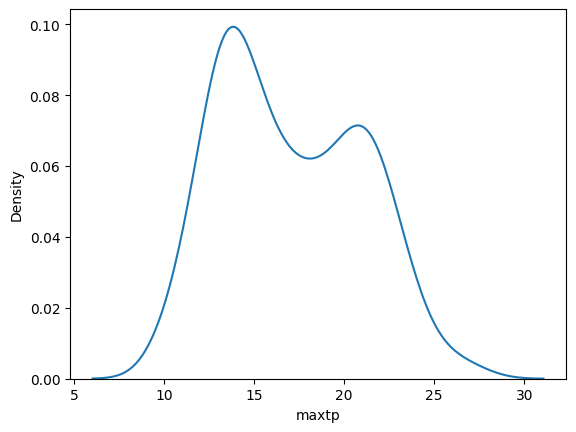

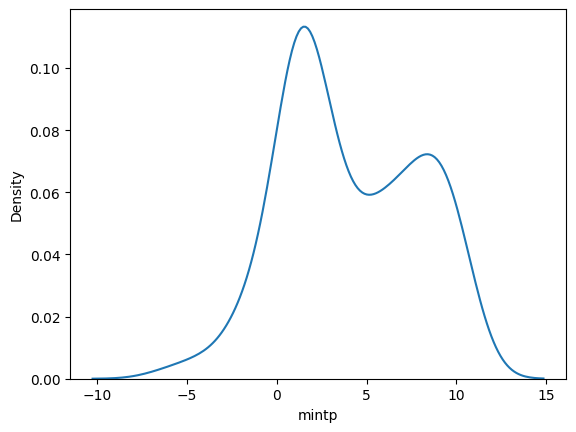

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch




# Input data
ireland_weather_data = pd.read_csv('C:/Users/danie/Desktop/csv.csv')
france_weather_data = pd.read_csv('C:/Users/danie/Desktop/NW2016.csv')


# Seaborn pairplots

sns.pairplot(ireland_weather_data, x_vars=['meant'], y_vars=['year','month'])
plt.show()

# # Comment: The mean temperature for this weather station for the period 2005 - 2025 (based on forecasts)
# # seems to vary around the 0 - 17.8 degrees Celsius
# ## However, a very predictable monthly pattern for the same period is occurring
# ## There is a clear skew towards higher temperatures at the end of summer

sns.pairplot(ireland_weather_data, x_vars=['maxtp','mintp'], y_vars=['year','month'])
plt.show()

# # Comment: On a monthly basis, there is a far greater variability in maximum temperature
# # than minimum temperature.
# ## On a yearly basis, maximum temperature is slightly skewed to the left while minimum
# ## temperature is slightly skewed to the right.
# ## This indicates a relatively tight temperature range


sns.pairplot(ireland_weather_data, x_vars=['rain'], y_vars=['year','month'])
plt.show()

# # Comment: There has been a linear increase in rainfall since 2005, with some values
# # being less than expected
# ## There is virtually no correlation between current month and amount of rainfall



sns.pairplot(ireland_weather_data, x_vars=['wdsp'], y_vars=['year','month'])
plt.show()

# # Comment: Windspeed is increasingly growing stronger in the period 2005-2025: However, there
# # is no year or month in which wind speed is not increasing beyond the curve of best fit.
# ## On a monthly basis, there is no correlation between the month and wind speed, but the values are
# ## more spaced out than for rainfall.


# # Density Plot
sns.kdeplot(ireland_weather_data['maxtp'])
plt.show()

sns.kdeplot(ireland_weather_data['mintp'])
plt.show()

# Comment: max temperature has twin peaks at 15 degrees (~0.1 of observations) and 22 (~0.07 of observations) degrees celsius.
## min temperature has twin peaks of 2 degrees (>0.1 of observations) and 8 degrees (0.07 of observations) degrees celsius
## The peaks for minimum temperature are flatter indicating a less grouped data set


# Heatmap for correlation matrix

ireland_weather_data['maxtp'] = pd.to_numeric(ireland_weather_data['maxtp'], errors='coerce')
ireland_weather_data['mintp'] = pd.to_numeric(ireland_weather_data['mintp'], errors='coerce')

# Remove any rows with NaN values that may have resulted from conversion
ireland_weather_data.dropna(subset=['maxtp', 'mintp'], inplace=True)

# Create a new DataFrame with just maxtp and mintp for the correlation matrix
temp_data = ireland_weather_data[['maxtp', 'mintp']]

# Generate the heatmap from the correlation matrix of the reduced DataFrame
sns.heatmap(temp_data.corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap between Max and Min Temperatures")
plt.show()

# Comment: 85% correlation between maximum and minimum temperatures



In [25]:

import pandas as pd

# Selecting numerical features here as an example
numerical_features = ireland_weather_data[['maxtp','mintp']].values
numerical_features_tensor = torch.tensor(numerical_features, dtype=torch.float64)

# Standardization can also be done with PyTorch
mean = torch.mean(numerical_features_tensor, dim=0)
std = torch.std(numerical_features_tensor, dim=0)
ireland_weather_scaled = (numerical_features_tensor - mean) / std


# Skewness and Kurtosis
print("maxtp Skewness: %f" % ireland_weather_data['maxtp'].skew())
print("mintp Skewness: %f" % ireland_weather_data['mintp'].skew())

# Comment: Slight positive skew in max temperature
## Negligible positive skew in min temperature

print("maxtp Kurtosis: %f" % ireland_weather_data['maxtp'].kurt())
print("mintp Kurtosis: %f" % ireland_weather_data['mintp'].kurt())

# Comment: Max temperature displays platykurtic kurtosis: There are fewer outliers than a normal distribution, and the peaks are flatter, tails are thinner
## Similiar kurtosis for min temperature

# Z-Score to identify outliers
from scipy.stats import zscore
ireland_weather_data['maxtemp_zscore'] = zscore(ireland_weather_data['maxtp'])
ireland_weather_data['mintemp_zscore'] = zscore(ireland_weather_data['mintp'])

maxtemp_outliers = ireland_weather_data[(ireland_weather_data['maxtemp_zscore'] > 2) | (ireland_weather_data['maxtemp_zscore'] < -2)]
mintemp_outliers = ireland_weather_data[(ireland_weather_data['mintemp_zscore'] > 2) | (ireland_weather_data['mintemp_zscore'] < -2)]

combined_outliers = pd.concat([maxtemp_outliers, mintemp_outliers]).drop_duplicates()


combined_outliers_filtered = combined_outliers[['year', 'month', 'maxtp', 'mintp']]

# Display the combined anomalies for max and min temperatures
print("Combined Anomalies in Maximum and Minimum Temperature:")
print(combined_outliers_filtered)

# Comment: These outlier values have a less than 0.03% chance of occuring (greater than 3 standard deviations)!

maxtp Skewness: 0.294827
mintp Skewness: 0.032260
maxtp Kurtosis: -0.948936
mintp Kurtosis: -0.836137
Combined Anomalies in Maximum and Minimum Temperature:
     year  month  maxtp  mintp
106  2013      7   25.4    9.5
166  2018      7   26.9   10.9
202  2021      7   25.8   10.6
215  2022      8   27.1   10.3
33   2007      6   19.9   -6.4
75   2010     12   10.0   -4.4
161  2018      2   13.6   -4.3
162  2018      3   11.0   -5.4
219  2022     12   12.1   -3.7


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# Assuming ireland_weather_data is your DataFrame

# Scale 'maxtp' and 'mintp'
scaler_maxtp = StandardScaler().fit_transform(ireland_weather_data[['maxtp']])
scaler_mintp = StandardScaler().fit_transform(ireland_weather_data[['mintp']])

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01)

# Fit and predict for 'maxtp'
iso_forest.fit(scaler_maxtp)
ireland_weather_data['is_maxtp_outlier'] = iso_forest.predict(scaler_maxtp)

# Fit and predict for 'mintp' using a new instance of the model to avoid overwriting
iso_forest = IsolationForest(contamination=0.01)  # Reinitialize to reset the model
iso_forest.fit(scaler_mintp)
ireland_weather_data['is_mintp_outlier'] = iso_forest.predict(scaler_mintp)

# Filter to find rows marked as outliers for either 'maxtp' or 'mintp'
ireland_outliers = ireland_weather_data[(ireland_weather_data['is_maxtp_outlier'] == -1) | (ireland_weather_data['is_mintp_outlier'] == -1)]

print("Outliers (Using Isolation Forest):")
print(ireland_outliers[['year', 'month', 'maxtp', 'mintp']])

# Comment: Adjusting contamination to 0.01 gave us a similiar number of outlier values


Outliers (Using Isolation Forest):
     year  month  maxtp  mintp
33   2007      6   19.9   -6.4
162  2018      3   11.0   -5.4
166  2018      7   26.9   10.9
202  2021      7   25.8   10.6
215  2022      8   27.1   10.3
219  2022     12   12.1   -3.7
